In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from metpy.units import units
from metpy import calc as mpcalc
import math
import netCDF4
from netCDF4 import Dataset
from datetime import datetime
import datetime as dt

In [2]:
#Reading in rd_t Datasets made in ensemble_mean script (odd=hightop, even=lowtop)
ct_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/ct_llmn_t.nc")
rt1_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/realt_jan.nc")
rt2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/realt_feb.nc")
t_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/ECMWF_llmn_t.nc")
t2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/ECCC_llmn_t.nc")
t3_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/UKMO_llmn_t.nc")
t4_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/CMA_llmn_t.nc")
t5_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/JMA_llmn_t.nc")
t6_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/box2_data/llmn_t/CNR_llmn_t.nc")

In [3]:
rt_llmn_ds = xr.concat([rt1_llmn_ds,rt2_llmn_ds], dim='time')

In [4]:
rt_llmn_ds

<xarray.Dataset>
Dimensions:  (time: 59)
Coordinates:
    level    int32 1000
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    t        (time) float64 278.4 279.0 282.6 286.6 ... 288.1 283.8 288.8 293.1

In [5]:
#Creating variables for the step and date of forecast
step = t_llmn_ds.step["step.days"] #<-- days forecasted out (47)
fd = t_llmn_ds.date["date.dayofyear"] #<--day of forecast(8)
step2 = t2_llmn_ds.step["step.days"] #<-- days forecasted out (32)
fd2 = t2_llmn_ds.date["date.dayofyear"] #<--day of forecast(4)
step3 = t3_llmn_ds.step["step.days"] 
fd3 = t3_llmn_ds.date["date.dayofyear"]
step4 = t4_llmn_ds.step["step.days"] 
fd4 = t4_llmn_ds.date["date.dayofyear"]
step5 = t5_llmn_ds.step["step.days"] 
fd5 = t5_llmn_ds.date["date.dayofyear"]
step6 = t6_llmn_ds.step["step.days"]
fd6 = t6_llmn_ds.date["date.dayofyear"]

#Creating time and number variables
time = ct_llmn_ds['time']
rt_time = rt_llmn_ds.time['time.dayofyear']
n1 = t_llmn_ds['number'].to_numpy()
n2 = t2_llmn_ds['number'].to_numpy()
n3 = t3_llmn_ds['number'].to_numpy()
n4 = t4_llmn_ds['number'].to_numpy()
n5 = t5_llmn_ds['number'].to_numpy()
n6 = t6_llmn_ds['number'].to_numpy()

In [6]:
step2

<xarray.DataArray 'days' (step: 32)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
Coordinates:
    level    int32 ...
  * step     (step) timedelta64[ns] 1 days 2 days 3 days ... 31 days 32 days

In [7]:
#Creating array of forecast day and step
doy1 = fd + step
doy2 = fd2 + step2
doy3 = fd3 + step3
doy4 = fd4 + step4
doy5 = fd5 + step5
doy6 = fd6 + step6

In [21]:
type(anom_t)

xarray.core.dataset.Dataset

In [22]:
type(doy1)

xarray.core.dataarray.DataArray

In [8]:
#Assigning number to climo lat/lon means
ct1_match = ct_llmn_ds.assign_coords(number=('number', n1))
ct2_match = ct_llmn_ds.assign_coords(number=('number', n2))
ct3_match = ct_llmn_ds.assign_coords(number=('number', n3))
ct4_match = ct_llmn_ds.assign_coords(number=('number', n4))
ct5_match = ct_llmn_ds.assign_coords(number=('number', n5))
ct6_match = ct_llmn_ds.assign_coords(number=('number', n6))

#Giving climo data forecast days and steps
ct1_match = ct1_match.sel(time=doy1)
ct2_match = ct2_match.sel(time=doy2)
ct3_match = ct3_match.sel(time=doy3)
ct4_match = ct4_match.sel(time=doy4)
ct5_match = ct5_match.sel(time=doy5)
ct6_match = ct6_match.sel(time=doy6)
ct_rt_match = ct_llmn_ds.sel(time=rt_time)

In [9]:
#Calculating Mean Area Temp Anoms
anom_t = t_llmn_ds - ct1_match
anom_t2 = t2_llmn_ds - ct2_match
anom_t3 = t3_llmn_ds - ct3_match
anom_t4 = t4_llmn_ds - ct4_match
anom_t5 = t5_llmn_ds - ct5_match
anom_t6 = t6_llmn_ds - ct6_match
anom_rt = rt_llmn_ds.t.values - ct_rt_match.t.values

In [19]:
anom_ttest = xr.concat([anom_t,doy1], dim='date')

TypeError: The elements in the input list need to be either all 'Dataset's or all 'DataArray's

In [11]:
#Making the actual anomalies back into xarray
anom_rt_ds = xr.DataArray(data=anom_rt, dims=["time"], coords=dict(time=rt_time),
                        attrs=dict(description="Temperature Anomaly", units="Kelvin"),)

In [12]:
anom_rt_ds

<xarray.DataArray (time: 59)>
array([ -3.29321594,  -2.64965771,   0.90532231,   4.92356993,
         6.37021407,   6.82419603,   1.60889642,  -1.09137526,
        -2.80422182,  -3.27882578,  -6.0428843 ,  -1.7654761 ,
         2.68185539,   7.55497123,   2.59218708,  -0.82900871,
         2.42954896,   3.06634306,   4.9295637 ,   0.45031449,
         3.12806903,   5.22507395,   0.34989522,   1.74982892,
         1.69184247,   2.25990702,  -2.54219105,  -5.51031501,
        -1.82201755,   4.02122238,   5.74567026,  -0.21034809,
         1.12386218,   4.56955818,   9.01787435,   0.82900648,
         1.18810602,  -5.14739571,  -4.44091725,  -6.70362321,
       -10.05282479, -12.8726971 , -15.58070624, -18.78687279,
       -18.58216343, -24.45639096, -24.29558258, -19.18959237,
       -15.53295139, -14.86820876,  -7.75122864,  -1.67445813,
         0.51632272,   5.56530376,   9.39451652,   1.57363727,
        -2.8849296 ,   1.96411399,   6.11411352])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 50 51 52 53 54 55 56 57 58 59
Attributes:
    description:  Temperature Anomaly
    units:        Kelvin

In [13]:
#Calculating Standard Deviations
stdf = anom_t.std(dim=['number'])
std = anom_t.std()
std2 = anom_t2.std()
std3 = anom_t3.std()
std4 = anom_t4.std()
std5 = anom_t5.std()
std6 = anom_t6.std()
rt_std = anom_rt_ds.std()
ct_std = ct_rt_match.std()

In [14]:
#Determining the Start and Length of the CAO under my justifications
a = anom_rt_ds < -.75* rt_std
a
#Lasts from day 40-51

<xarray.DataArray (time: 59)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 50 51 52 53 54 55 56 57 58 59

In [15]:
anom_t

<xarray.Dataset>
Dimensions:  (number: 50, step: 47, date: 8)
Coordinates:
    level    int32 1000
  * number   (number) int32 1 2 3 4 5 6 7 8 9 10 ... 42 43 44 45 46 47 48 49 50
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * date     (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
    time     (date, step) float64 4.0 5.0 6.0 7.0 8.0 ... 71.0 72.0 73.0 74.0
    hour     float64 ...
    lev      int32 ...
Data variables:
    t        (date, step, number) float64 4.967 4.801 4.795 ... 1.58 0.5976

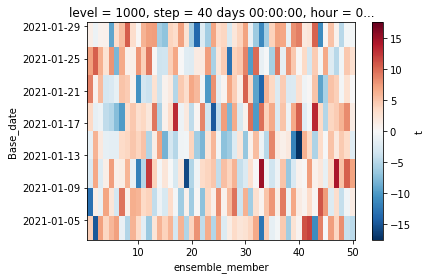

In [16]:
#What if I did the average over the length of the event and plotted the average? 
##This could help show which ensembles did the best over time.
anom_t.sel(step=anom_t.step.dt.days == 40).t.plot()

/tmp/ipykernel_97105/677083337.py:6: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  date1 = dt.datetime(2021,1,fd[yy],0)   # first date to plot
/tmp/ipykernel_97105/677083337.py:6: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  date1 = dt.datetime(2021,1,fd[yy],0)   # first date to plot
/tmp/ipykernel_97105/677083337.py:6: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  date1 = dt.datetime(2021,1,fd[yy],0)   # first date to plot
/tmp/ipykernel_97105/677083337.py:6: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may 

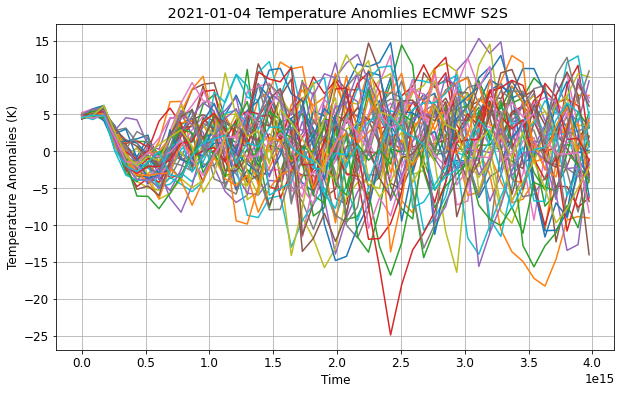

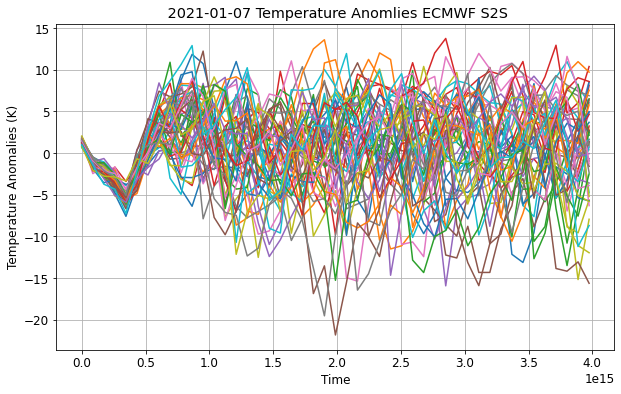

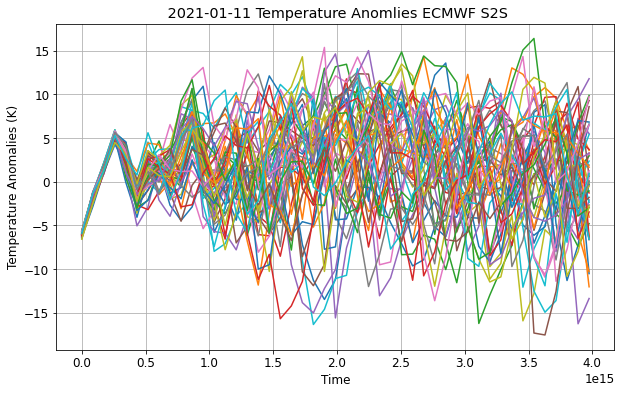

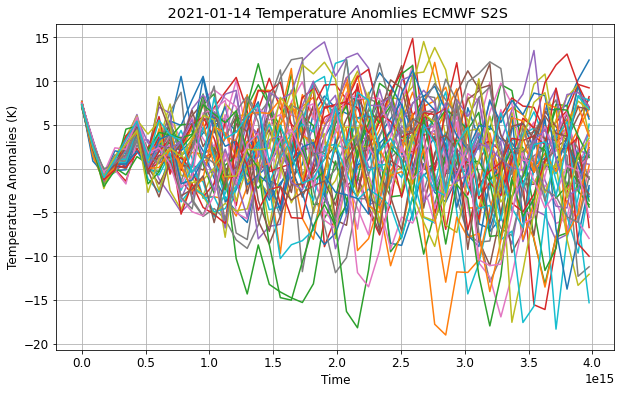

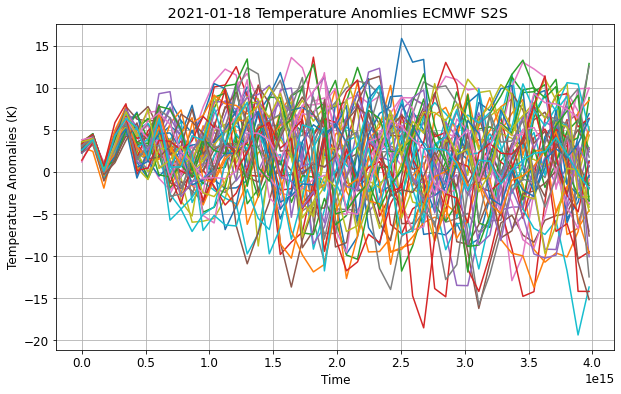

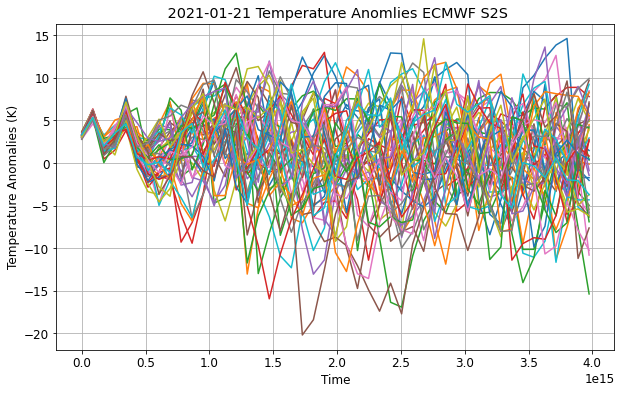

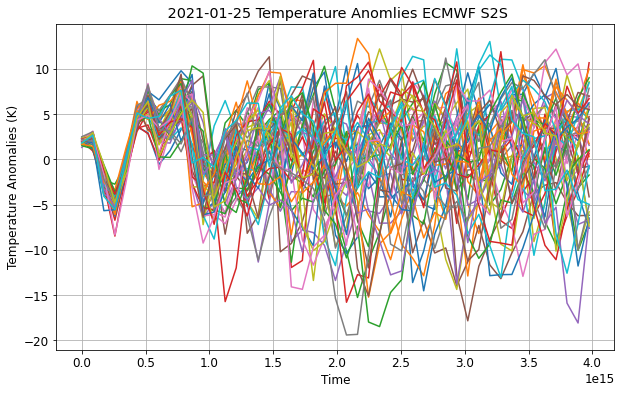

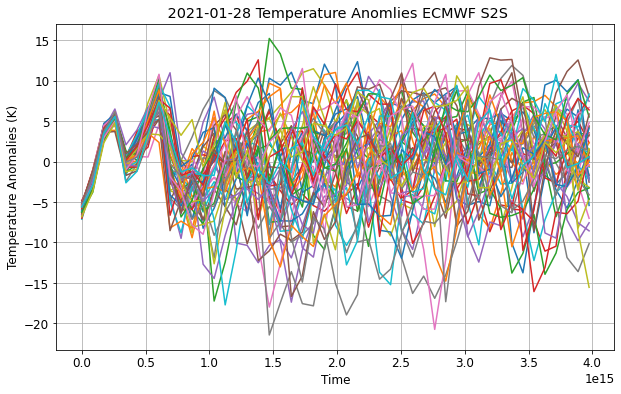

In [17]:
#Plotting ECMWF
for yy in range(0,8,1):
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(10, 6))
    #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
    date1 = dt.datetime(2021,1,fd[yy],0)   # first date to plot
    datetoplot = date1.strftime('%Y-%m-%d')


    #loop through each member
    for m in range(0,50,1):
        anom_t_toplot =  anom_t.isel(number=m, date=yy)#.step["step.days"]
        anom_t_toplot.t.plot(x='step')

    # Add some plot lables and legends
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature Anomalies (K)')
    ax.set_title(f' {datetoplot} Temperature Anomlies ECMWF S2S')
    ax.grid(True)

In [ ]:
#Plotting ECCC
for yy in range(0,4,1):
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(10, 6))
    #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
    date1 = dt.datetime(2021,1,fd2[yy],0)   # first date to plot
    datetoplot = date1.strftime('%Y-%m-%d')


    #loop through each member
    for m in range(0,20,1):
        anom_t2_toplot =  anom_t2.isel(number=m, date=yy)
        anom_t2_toplot.t.plot(x='step')

    # Add some plot lables and legends
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature Anomalies (K)')
    ax.set_title(f' {datetoplot} Temperature Anomlies ECCC S2S')
    ax.grid(True)

In [ ]:
#Plotting UKMO
for yy in range(0,31,1):
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(10, 6))
    #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
    date1 = dt.datetime(2021,1,fd3[yy],0)   # first date to plot
    datetoplot = date1.strftime('%Y-%m-%d')


    #loop through each member
    for m in range(0,3,1):
        anom_t3_toplot =  anom_t3.isel(number=m, date=yy)
        anom_t3_toplot.t.plot(x='step')

    # Add some plot lables and legends
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature Anomalies (K)')
    ax.set_title(f' {datetoplot} Temperature Anomlies UKMO S2S')
    ax.grid(True)

In [ ]:
#Plotting CMA
for yy in range(0,8,1):
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(10, 6))
    #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
    date1 = dt.datetime(2021,1,fd4[yy],0)   # first date to plot
    datetoplot = date1.strftime('%Y-%m-%d')


    #loop through each member
    for m in range(0,3,1):
        anom_t4_toplot =  anom_t4.isel(number=m, date=yy)
        anom_t4_toplot.t.plot(x='step')

    # Add some plot lables and legends
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature Anomalies (K)')
    ax.set_title(f' {datetoplot} Temperature Anomlies CMA S2S')
    ax.grid(True)

In [ ]:
#Plotting JMA
for yy in range(0,4,1):
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(10, 6))
    #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
    date1 = dt.datetime(2021,1,fd5[yy],0)   # first date to plot
    datetoplot = date1.strftime('%Y-%m-%d')


    #loop through each member
    for m in range(0,49,1):
        anom_t5_toplot =  anom_t5.isel(number=m, date=yy)
        anom_t5_toplot.t.plot(x='step')

    # Add some plot lables and legends
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature Anomalies (K)')
    ax.set_title(f' {datetoplot} Temperature Anomlies JMA S2S')
    ax.grid(True)

In [ ]:
#Plotting CNR
for yy in range(0,4,1):
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(10, 6))
    #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
    date1 = dt.datetime(2021,1,fd6[yy],0)   # first date to plot
    datetoplot = date1.strftime('%Y-%m-%d')


    #loop through each member
    for m in range(0,40,1):
        anom_t6_toplot =  anom_t6.isel(number=m, date=yy)
        anom_t6_toplot.t.plot(x='step')

    # Add some plot lables and legends
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature Anomalies (K)')
    ax.set_title(f' {datetoplot} Temperature Anomlies CNR S2S')
    ax.grid(True)

In [ ]:
anom_t6

In [ ]:
for m in range(0,2,1):
    for n in range(0,8,1):
#    at1_plt = anom_t.loc[dict(date=7,number=m)]
    #print(u_data_mem)
    # Specify how our lines should look
    #colorR = (m+2)/ 15.
#    ax.plot(u_data_mem.time, u_data_mem.values, color=(colorR,.2,1-colorR,), label='Mem '+str(m))
        anom_t.isel(number=m,date=n).t.plot()

In [ ]:
rt_llmn_ds.t.plot()
plt.title('Temperature Jan&Feb 2021')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')

In [ ]:
#Plotting the actual temperature anomalies
anom_rt_ds.plot(color='tab:blue')
plt.title('ERA5 Temperature Anomalies Jan & Feb 2021')
plt.xlabel('Day of Year')
plt.ylabel('Temperature Anomalies (K)')

In [ ]:
anom_t3

In [ ]:
anom_t

In [ ]:
import datetime
dateyouwant = datetime.datetime(2021, 2, 9, 0, 0, 0)
dateyouwant.strftime("%Y-%m-%d %H:%M:%S:%f")

In [ ]:
dayiwant=anom_t['date'][0] + anom_t['step'][36]
dayiwant

In [ ]:
anom_t5

In [ ]:
#Determining which steps are needed for which dates
##then you can loop over initialization times, and add each step to the time and check if that new time equals 
##the day you are trying to get. then you can tell it to give you which initialization tiem and which step equals 
##that date
pd.to_datetime('2021-02-05 00:00:000000000')

for ii in anom_t['date']:
    for jj in anom_t['step']:
        if ii + jj == dayiwant:
            ii1 = ii.date.values
            jj1 = jj.step.dt.days.values
#           print(f'ECMWF:{ii1}, {jj1}')

for ii in anom_t2['date']:
    for jj in anom_t2['step']:
        if ii + jj == dayiwant:
            ii2 = ii.date.values
            jj2 = jj.step.dt.days.values
#            print(f'ECCC:{ii2}, {jj2}')
            
for ii in anom_t3['date']:
    for jj in anom_t3['step']:
        if ii + jj == dayiwant:
            ii3 = ii.date.values
            jj3 = jj.step.dt.days.values
#            print(f'UKMO:{ii3}, {jj3}')
                        
for ii in anom_t4['date']:
    for jj in anom_t4['step']:
        if ii + jj == dayiwant:
            ii4 = ii.date.values
            jj4 = jj.step.dt.days.values
#            print(f'CMA:{ii4}, {jj4}')
                        
for ii in anom_t5['date']:
    for jj in anom_t5['step']:
        if ii + jj == dayiwant:
            ii5 = ii.date.values
            jj5 = jj.step.dt.days.values
#            print(f'JMA:{ii5}, {jj5}')
            
for ii in anom_t6['date']:
    for jj in anom_t6['step']:
        if ii + jj == dayiwant:
            ii6 = ii.date.values
            jj6 = jj.step.dt.days.values
#            print(f'CNR:{ii6}, {jj6}')

In [ ]:
date1 = ['2021-01-04T00:00:00.000000000', '2021-01-07T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
         '2021-01-14T00:00:00.000000000', '2021-01-18T00:00:00.000000000','2021-01-21T00:00:00.000000000',
         '2021-01-25T00:00:00.000000000', '2021-01-28T00:00:00.000000000']
date1test = [0,1,2,3,4,5,6,7,8]
stp1 = [36,33,29,26,22,19,15,12]
stp2 = [26,19,12]
stp3 = [39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9]
stp4 = [36,33,29,26,22,19,15,12]
stp5 = [27,20,13]
stp6 = [26,19,12]

#anom_t2.sel(date = anom_t.date == anom_t.date[m+1],step=anom_t.step.dt.days == stp1[m])

In [ ]:
anom_t6

In [ ]:
for m in range(0,8,1):
    at_sel1 = anom_t.sel(date = anom_t.date == anom_t.date[m],step=anom_t.step.dt.days == stp1[m])
    cao_t1 = at_sel1 <= -0.75 * std
    ct1 = cao_t1.where(cao_t1.t == True)
    ctf1 = ct1.sum()
#    print(ctf1.t.values)
#ctf1 = [7,11,8,10,11,10,10,10], 8 dates, 50 ens
for m in range(0,3,1):
    at_sel2 = anom_t2.sel(date = anom_t2.date == anom_t2.date[m+1],step=anom_t2.step.dt.days == stp2[m])
    cao_t2 = at_sel2 <= -0.75 * std2
    ct2 = cao_t2.where(cao_t2.t == True)
    ctf2 = ct2.sum()
#    print(ctf2.t.values)
#ctf2 = [6,5,8], 3 dates, 20 ens
for m in range(0,31,1):
    at_sel3 = anom_t3.sel(date = anom_t3.date == anom_t3.date[m],step=anom_t3.step.dt.days == stp3[m])
    cao_t3 = at_sel3 <= -0.75 * std3
    ct3 = cao_t3.where(cao_t3.t == True)
    ctf3 = ct3.sum()
#    print(ctf3.t.values)
#ctf3 = [0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,
#       0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,3.0], 61 steps, 31 dates, 3 ens
for m in range(0,8,1):
    at_sel4 = anom_t4.sel(date = anom_t4.date == anom_t4.date[m],step=anom_t4.step.dt.days == stp4[m])
    cao_t4 = at_sel4 <= -0.75 * std4
    ct4 = cao_t4.where(cao_t4.t == True)
    ctf4 = ct4.sum()
#    print(ctf4.t.values) 
# ctf4 = [0,0,0,0,1,0,1,0]
#ens: 3, step: 61, date: 8
for m in range(0,3,1):
    at_sel5 = anom_t5.sel(date = anom_t5.date == anom_t5.date[m],step=anom_t5.step.dt.days == stp5[m])
    cao_t5 = at_sel5 <= -0.75 * std5
    ct5 = cao_t5.where(cao_t5.t == True)
    ctf5 = ct5.sum()
#    print(ctf5.t.values)
# ctf5 = [5,6,3]
#ens: 49, step: 33, date: 4 total (only3 for project)
for m in range(0,3,1):
    at_sel6 = anom_t6.sel(date = anom_t6.date == anom_t6.date[m],step=anom_t6.step.dt.days == stp6[m])
    cao_t6 = at_sel6 <= -0.75 * std6
    ct6 = cao_t6.where(cao_t6.t == True)
    ctf6 = ct6.sum()
#    print(ctf6.t.values)
# ctf6 = [5,7,0]
#ens: 40, step: 33, date: 4 total (only3 for project)

In [ ]:
ctf1_list = [7,11,8,10,11,10,10,10]
avg1 = sum(ctf1_list)/(8*50)*100
ctf2_list = [6,5,8]
avg2 = sum(ctf2_list)/(3*20)*100
ctf3_list = [0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,
            0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,3.0]
avg3= sum(ctf3_list)/(31*3)*100
ctf4_list = [0,0,0,0,1,0,1,0]
avg4= sum(ctf4_list)/(8*3)*100
ctf5_list = [5,6,3]
avg5 = sum(ctf5_list)/(3*49)*100
ctf6_list = [5,7,0]
avg6 = sum(ctf6_list)/(3*40)*100

ht_avg = (avg1+avg3+avg5)/3
lt_avg = (avg2+avg4+avg6)/3


In [ ]:
#Creating Slices in order to select dates that are in between these 5day ranges
s10 = slice("2021-01-27T00:00:00.000000000", "2021-01-31T00:00:00.000000000") #<-- 10-14 days in advance
s15 = slice("2021-01-22T00:00:00.000000000", "2021-01-26T00:00:00.000000000") #<-- 15-19 days in advance
s20 = slice("2021-01-17T00:00:00.000000000", "2021-01-21T00:00:00.000000000") #<-- 20-24 day 
s25 = slice("2021-01-12T00:00:00.000000000", "2021-01-16T00:00:00.000000000") #<-- 25-29 days
s30 = slice("2021-01-07T00:00:00.000000000", "2021-01-11T00:00:00.000000000") #<-- 30-34 days 
s35 = slice("2021-01-02T00:00:00.000000000", "2021-01-06T00:00:00.000000000") #<-- 35-39 days

In [ ]:
anom_t6

In [ ]:
#Calc % s10
per1_s10 = (10/(50*1))*100
per2_s10 = 8/(20*1)*100
per3_s10 = (9/(3*5))*100
per4_s10 = 0/(3*1)*100
per5_s10 = 3/(49*1)*100
per6_s10 = (0/(40*1))*100

#Calc % s15
per1_s15 = (10/(50*1))*100
per2_s15 = False #<--no model runs over this time
per3_s15 = (1/(3*5))*100
per4_s15 = (1/(3*1))*100
per5_s15 = False #<--no model runs over this time period
per6_s15 = False #<-- no model run during this time

#Calc % s20
per1_s20 = (21/(50*2))*100
per2_s20 = (5/(20*1))*100
per3_s20 = (1/(3*5))*100
per4_s20 = (1/(3*2))*100
per5_s20 = (6/(49*1))*100
per6_s20 = (7/(40*1))*100

#Calc % s25
per1_s25 = (10/(50*1))*100
per2_s25 = (6/(20*1))*100
per3_s25 = (5/(3*5))*100
per4_s25 = (0/(3*1))*100
per5_s25 = (5/(49*1))*100
per6_s25 = (5/(40*1))*100

#Calc % s30
per1_s30 = (19/(50*2))*100
per2_s30 = False #<--no step
per3_s30 = (2/(3*5))*100
per4_s30 = (0/(3*2))*100
per5_s30 = False #<--no date
per6_s30 = False #<--no date

#Calc % s35
per1_s35 = (7/(50*1))*100
per2_s35 = False #<--no date
per3_s35 = (2/(3*5))*100
per4_s35 = (0/(3*1))*100
per5_s35 = False #<--no step 
per6_s35 = False #<--no date

In [ ]:
#Printing Percentages for each model
print(f'ECMWF: {per1_s10}, {per1_s15}, {per1_s20}, {per1_s25}, {per1_s30}, {per1_s35}')
print(f'ECCC: {per2_s10}, {per2_s15}, {per2_s20}, {per2_s25}, {per2_s30}, {per2_s35}')
print(f'UKMO: {per3_s10}, {per3_s15}, {per3_s20}, {per3_s25}, {per3_s30}, {per3_s35}')
print(f'CMA: {per4_s10}, {per4_s15}, {per4_s20}, {per4_s25}, {per4_s30}, {per4_s35}')
print(f'JMA: {per5_s10}, {per5_s15}, {per5_s20}, {per5_s25}, {per5_s30}, {per5_s35}')
print(f'CNR: {per6_s10}, {per6_s15}, {per6_s20}, {per6_s25}, {per6_s30}, {per6_s35}')

In [ ]:
per1 = (per1_s35 + per1_s10 + per1_s15 + per1_s20 + per1_s25 + per1_s30)/6
per2 = (per2_s10 + per2_s20 + per2_s25)/3
per3 = (per3_s35 + per3_s10 + per3_s15 + per3_s20 + per3_s25 + per3_s30)/6
per4 = (per4_s35 + per4_s10 + per4_s15 + per4_s20 + per4_s25 + per4_s30)/6
per5 = (per5_s10 + per5_s20 + per5_s25)/3
per6 = (per6_s10 + per6_s20 + per6_s25)/3
htm_avg = (per1+per3+per5)/3
ltm_avg = (per2+per4+per6)/3

In [ ]:
#Printing the Averages w/no lead time
print(f'ECMWF:{avg1}')
print(f'ECCC:{avg2}')
print(f'UKMO:{avg3}')
print(f'CMA:{avg4}')
print(f'JMA:{avg5}')
print(f'CNR:{avg6}')
print(f'HT:{ht_avg}')
print(f'LT:{lt_avg}')

In [ ]:
print('Predicting 1st Day')
print(f'ECMWF correct = {per1}')
print(f'ECCC correct = {per2}')
print(f'UKMO correct = {per3}')
print(f'CMA correct = {per4}')
print(f'JMA correct = {per5}')
print(f'CNR correct = {per6}')
print(f'High-top Avg = {htm_avg}')
print(f'Low-top Avg = {ltm_avg}')
#print('Average Percentages for different lead times')
#print(f'High-top Avg s5= {htm_avg_s5}')
#print(f'Low-top Avg s5= {ltm_avg_s5}')
#print(f'High-top Avg s10= {htm_avg_s10}')
#print(f'Low-top Avg s10= {ltm_avg_s10}')
#print(f'High-top Avg s15= {htm_avg_s15}')
#print(f'Low-top Avg s15= {ltm_avg_s15}')
#print(f'High-top Avg s20= {htm_avg_s20}')
#print(f'Low-top Avg s20= {ltm_avg_s20}')
#print(f'High-top Avg s25= {htm_avg_s25}')
#print(f'Low-top Avg s25= {ltm_avg_s25}')
#print(f'High-top Avg s30= {htm_avg_s30}')
#print(f'Low-top Avg s30= {ltm_avg_s30}')

In [ ]:
htm_avg_s35 = (per1_s35 + per3_s35 + per5_s35)/3
ltm_avg_s35 = (per2_s35 + per4_s35 + per6_s35)/3
htm_avg_s10 = (per1_s10 + per3_s10 + per5_s10)/2 
ltm_avg_s10 = (per2_s10 + per4_s10 + per6_s10)/1 
htm_avg_s15 = (per1_s15 + per3_s15 + per5_s15)/3 
ltm_avg_s15 = (per2_s15 + per4_s15 + per6_s15)/3 
htm_avg_s20 = (per1_s20 + per3_s20 + per5_s20)/3
ltm_avg_s20 = (per2_s20 + per4_s20 + per6_s20)/3
htm_avg_s25 = (per1_s25 + per3_s25 + per5_s25)/2
ltm_avg_s25 = (per2_s25 + per4_s25 + per6_s25)/3
htm_avg_s30 = (per1_s30 + per3_s30 + per5_s30)/3
ltm_avg_s30 = (per2_s30 + per4_s30 + per6_s30)/1
htmf_avg = (perf1 + perf3 + perf5)/3
ltmf_avg = (perf2 + perf4 + perf6)/3
per4
perf4

## This is the start of old, unopporational code

In [ ]:
####This will be looked at later
#Calculating the % of correct forecasts for duration of event
#anom_tf1 = anom_t.isel(step=anom_t.step.dt.days.isin([31, 32, 33]))
#cao_tf1 = anom_tf1 <= -3 * std
#caof1 = cao_tf1 == True
#ct1f = caof1.where(caof1.t == True)
#ct1f.sum().values
#perf1 = 477/(3*400) * 100

#anom_tf2 = anom_t2.isel(step=anom_t2.step.dt.days.isin([31, 32, 33]))
#cao_tf2 = anom_tf2 <= -3 * std2
#caof2 = cao_tf2 == True
#ct2f = caof2.where(caof2.t == True)
#ct2f.sum().values
#perf2 = 45/(3*80) *100

#anom_tf3 = anom_t3.isel(step=anom_t3.step.dt.days.isin([31, 32, 33]))
#cao_tf3 = anom_tf3 <= -3 * std3
#caof3 = cao_tf3 == True
#ct3f = caof3.where(caof3.t == True)
#ct3f.sum().values
#perf3 = 71/(3*93) *100

#anom_tf4 = anom_t4.isel(step=anom_t4.step.dt.days.isin([31, 32, 33]))
#cao_tf4 = anom_tf4 <= -3 * std4
#caof4 = cao_tf4 == True
#ct4f = caof4.where(caof4.t == True)
#ct4f.sum().values
#perf4 = 24/(3*24) *100

#anom_tf5= anom_t5.isel(step=anom_t5.step.dt.days.isin([31, 32, 33]))
#cao_tf5 = anom_tf5 <= -3 * std5
#caof5 = cao_tf5 == True
#ct5f = caof5.where(caof5.t == True)
#ct5f.sum().values
#perf5 = 165/(3*196) *100

#anom_tf6= anom_t6.isel(step=anom_t6.step.dt.days.isin([31, 32, 33]))
#cao_tf6 = anom_tf6 <= -3 * std6
#caof6 = cao_tf6 == True
#ct6f = caof6.where(caof6.t == True)
#ct6f.sum().values
#perf6 = 220/(3*160) *100

In [ ]:
per_arr=([per1_s5, per2_s5, per3_s5, per4_s5, per5_s5, per6_s5],
        [per1_s10, per2_s10, per3_s10, per4_s10, per5_s10, per6_s10],
        [per1_s15, per2_s15, per3_s15, per4_s15, per5_s15, per6_s15],
        [per1_s20, per2_s20, per3_s20, per4_s20, per5_s20, per6_s20],
        [per1_s25, per2_s25, per3_s25, per4_s25, per5_s25, per6_s25],
        [per1_s30, per2_s30, per3_s30, per4_s30, per5_s30, per6_s30],)
per_arr
#Need to change to order of the array, per1--> and 

In [ ]:
per_arr2=(([per1_s5, per1_s10, per1_s15, per1_s20, per1_s25, per1_s30]),
        ([per2_s5, per2_s10, per2_s15, per2_s20, per2_s25, per2_s30]),
        ([per3_s5, per3_s10, per3_s15, per3_s20, per3_s25, per3_s30]),
        ([per4_s5, per4_s10, per4_s15, per4_s20, per4_s25, per4_s30]),
        ([per5_s5, per5_s10, per5_s15, per5_s20, per5_s25, per5_s30]),
        ([per6_s5, per6_s10, per6_s15, per6_s20, per6_s25, per6_s30]))
#        ([5,10,15,20,25,30]))
per_arr2